### Reference

https://www.geeksforgeeks.org/analyzing-decision-tree-and-k-means-clustering-using-iris-dataset/

https://github.com/codebasics/py/blob/master/ML/13_kmeans/13_kmeans_tutorial.ipynb

https://medium.com/analytics-vidhya/clustering-on-iris-dataset-in-python-using-k-means-4735b181affe

### Import libraries

In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [33]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings('ignore')

### Load dataset

In [34]:
iris = load_iris()
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### Data visualization

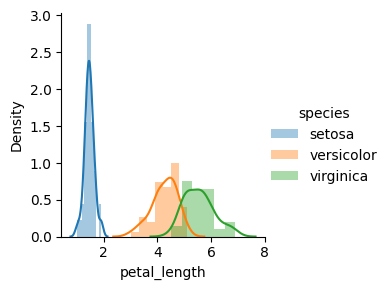

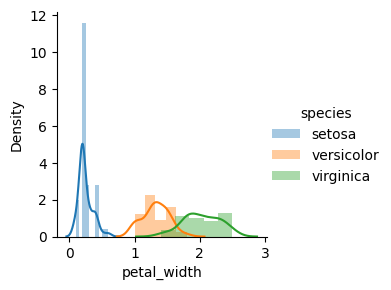

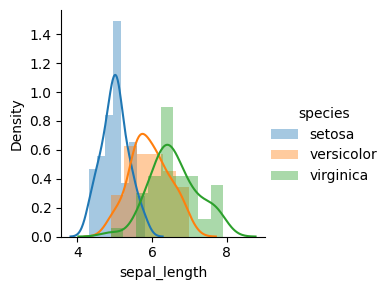

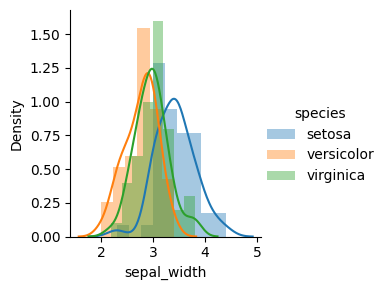

In [35]:
iris_setosa = iris.loc[iris["species"] == "Iris-setosa"]
iris_virginica = iris.loc[iris["species"] == "Iris-virginica"]
iris_versicolor = iris.loc[iris["species"] == "Iris-versicolor"]

sns.FacetGrid(iris, hue="species").map(sns.distplot,"petal_length").add_legend()
sns.FacetGrid(iris, hue="species").map(sns.distplot,"petal_width").add_legend()
sns.FacetGrid(iris, hue="species").map(sns.distplot, "sepal_length").add_legend()
sns.FacetGrid(iris, hue="species").map(sns.distplot, "sepal_width").add_legend()
plt.show()

In [36]:
#Prepare dataset
X = iris.iloc[:, :-2]

### K Means Clustering Algorithm

### Elbow plot

In [37]:
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,
                    init='k-means++',
                    max_iter=300,
                    n_init=10,
                    random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

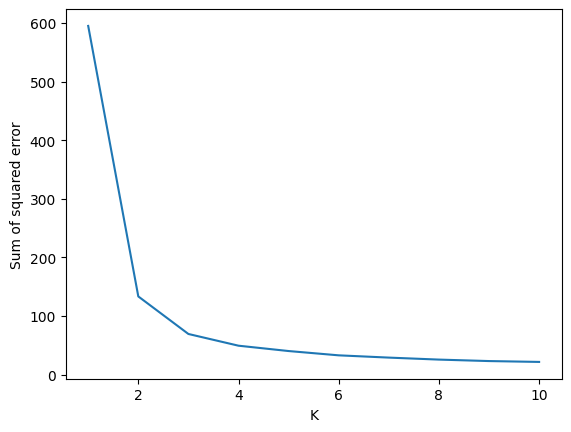

In [38]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(range(1,11),wcss)

## K = 3

In [ ]:
# from above array with help of elbow method
#we can get no of cluster to provide.
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(X)


### Visualizing the clusters

In [70]:
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

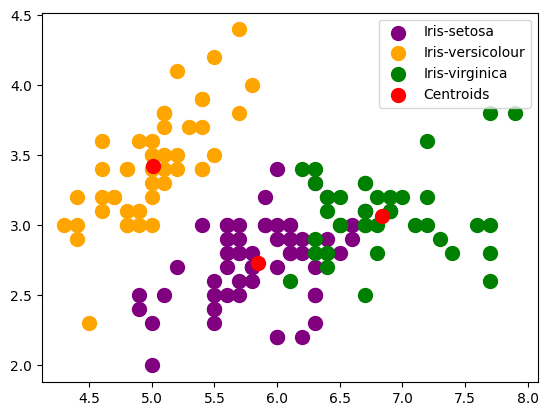

In [65]:
cols = iris.columns
plt.scatter(X.loc[y_kmeans == 0, cols[0]], X.loc[y_kmeans == 0, cols[1]], s=100, c='purple', label='Iris-setosa')
plt.scatter(X.loc[y_kmeans == 1, cols[0]], X.loc[y_kmeans == 1, cols[1]], s=100, c='orange', label='Iris-versicolour')
plt.scatter(X.loc[y_kmeans == 2, cols[0]], X.loc[y_kmeans == 2, cols[1]], s=100, c='green', label='Iris-virginica')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='red', label='Centroids')
plt.legend()

In [69]:
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 3, 3, 3, 0, 3, 0, 3, 0, 3, 0, 0, 0, 0, 3, 0, 3,
       0, 0, 3, 0, 3, 0, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 3, 0, 3, 3, 3,
       0, 0, 0, 3, 0, 0, 0, 0, 0, 3, 0, 0, 2, 3, 2, 3, 2, 2, 0, 2, 2, 2,
       3, 3, 2, 3, 3, 3, 3, 2, 2, 3, 2, 3, 2, 3, 2, 2, 3, 3, 3, 2, 2, 2,
       3, 3, 3, 2, 3, 3, 3, 2, 2, 3, 3, 2, 2, 3, 3, 3, 3, 3], dtype=int32)

In [62]:
from scipy.stats import mode

# Map species to numerical values
species_to_num = {'setosa': 0, 'versicolor': 1, 'virginica': 2}
y = iris['species'].map(species_to_num).values
labels = np.zeros_like(y_kmeans)

for i in range(3):
    mask = (y_kmeans == i)
    labels[mask] = mode(y[mask])[0]

In [61]:
# คำนวณ accuracy และ confusion matrix
acc = accuracy_score(y, labels)
cm = confusion_matrix(y, labels)

# แสดงผล
print("Accuracy:", acc)
print("Confusion Matrix:\n", cm)

Accuracy: 0.88
Confusion Matrix:
 [[50  0  0]
 [ 0 45  5]
 [ 0 13 37]]
